# Scenario 1: 2-headed Coin

In [ ]:
from montecarlo import Die, Game, Analyzer

In [ ]:
Faces = ['H','T']
Fair = Die(Faces)
Unfair = Die(Faces)
Unfair.change_weight('H',5)

Play a game of 1,000 flips with three coins with all fair dice. 

In [ ]:
Game = Game([Fair,Fair,Fair])
Game.play(1000)
Analysis = Analyzer(Game)
Fair_Jackpot = Analysis.jackpot()/1000
print(Fair_Jackpot)

0.229


Play a game of 1,000 flips with three coins with two unfair dice and one fair die

In [ ]:
from montecarlo import Game
Unfair_Game = Game([Unfair,Fair,Unfair])
Unfair_Game.play(1000)
Analysis = Analyzer(Unfair_Game)
Unfair_Jackpot = Analysis.jackpot()/1000
print(Unfair_Jackpot)

0.342


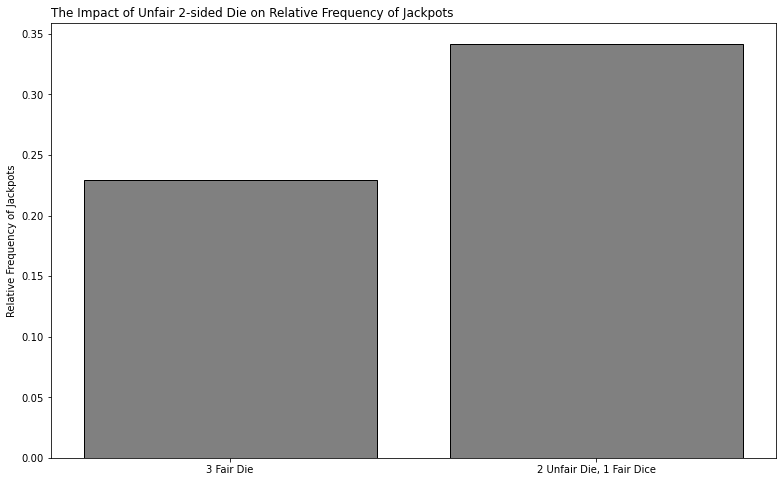

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.bar(['3 Fair Die','2 Unfair Die, 1 Fair Dice'],[Fair_Jackpot, Unfair_Jackpot],color='gray',edgecolor='black')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('The Impact of Unfair 2-sided Die on Relative Frequency of Jackpots',loc='left')
plt.show()

## Scenario 2: 6-sided Die
Note: I know the prompt asked to play the game 10,000 times, but I found that at only 10,000 rolls, I had run-to-run variance in the relative frequency of jackpots. I increased the number of games played to 100,000 and that seemed to allow the relative frequency of jackpots to converge to approximately 0.00075 (1,333-to-1 odds) and 0.00085 (1,176-to-1  odds) for all fair and some unfair die, respectively.

In [ ]:
from montecarlo import Die, Game, Analyzer

In [ ]:
Faces = [1,2,3,4,5,6]
Die1 = Die(Faces)
Die1.change_weight(6,5)
Die2 = Die(Faces)
Die2.change_weight(1,5)
Die = Die(Faces)

In [ ]:
Fair_Game = Game([Die, Die, Die, Die, Die])
Fair_Game.play(100000)
Analysis = Analyzer(Fair_Game)
Fair_Jackpots = Analysis.jackpot()/100000
Analysis.Combo()
Fair_Combo = Analysis.combo[:10]


In [ ]:
from montecarlo import Game
Unfair_Game = Game([Die1,Die1,Die2,Die,Die])
Unfair_Game.play(100000)
Analysis = Analyzer(Unfair_Game)
Unfair_Jackpots = Analysis.jackpot()/100000
Analysis.Combo()
Unfair_Combo = Analysis.combo[:10]


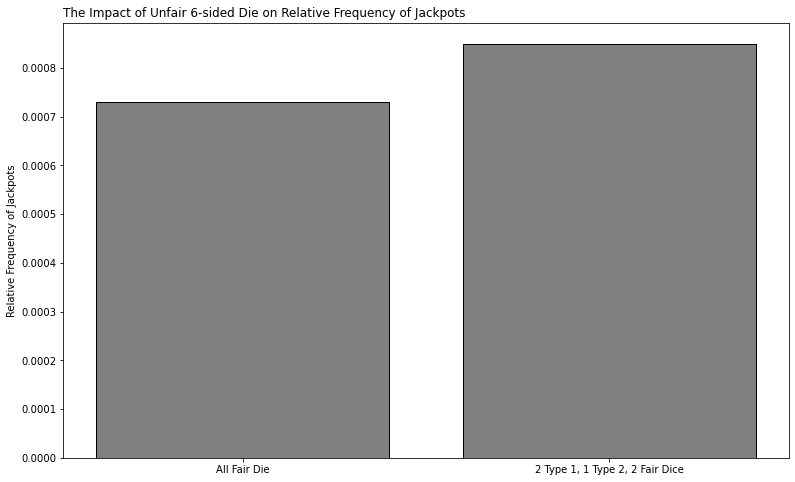

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.bar(['All Fair Die','2 Type 1, 1 Type 2, 2 Fair Dice'],[Fair_Jackpots, Unfair_Jackpots],color='gray',edgecolor='black')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('The Impact of Unfair 6-sided Die on Relative Frequency of Jackpots',loc='left')
plt.show()

Lets get the combinations of the rolled faces and their corresponding frequency, then plot them in a bar chart. 

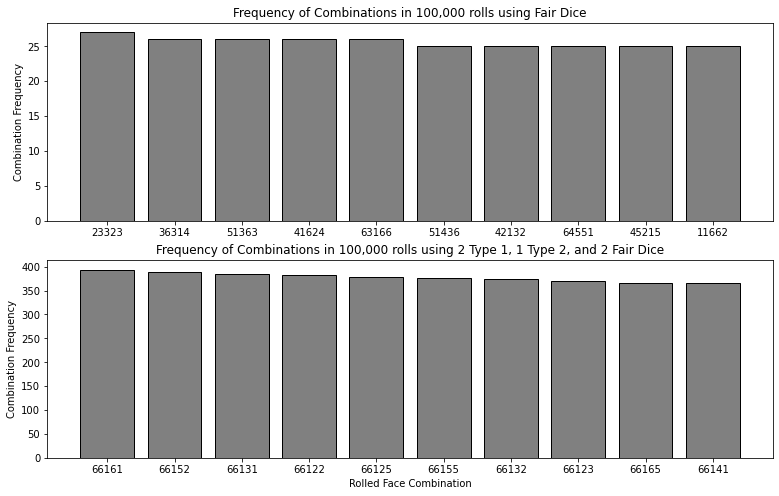

In [ ]:
name_fair = []
frequency_fair = []
for i in range(len(Fair_Combo)):
    name_fair.append(''.join(str(e) for e in list(Fair_Combo.index[i])))
    frequency_fair.append(Fair_Combo.values[i][0])

name_unfair = []
frequency_unfair = []
for i in range(len(Unfair_Combo)):
    name_unfair.append(''.join(str(e) for e in list(Unfair_Combo.index[i])))
    frequency_unfair.append(Unfair_Combo.values[i][0])

fig, ax = plt.subplots(2,figsize=(13,8))
ax[0].bar(name_fair, frequency_fair,color='gray',edgecolor='black')
ax[0].set(ylabel = 'Combination Frequency')
ax[1].bar(name_unfair, frequency_unfair,color='gray',edgecolor='black')
ax[1].set(ylabel = 'Combination Frequency')
ax[1].set(xlabel = 'Rolled Face Combination')
ax[0].set(title ='Frequency of Combinations in 100,000 rolls using Fair Dice')
ax[1].set(title ='Frequency of Combinations in 100,000 rolls using 2 Type 1, 1 Type 2, and 2 Fair Dice')
plt.show()

## Scenario 3: Roman Alphabet

In [ ]:
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer

Alphabet = pd.read_csv('roman_alphabet.txt',delimiter='\t',header=None,names=['Letter','Weight'])
Alphabet['Letter'] = Alphabet['Letter'].astype('str')

In [ ]:
Die = Die(Alphabet['Letter'].tolist())

for i in range(len(Alphabet)):
    Die.change_weight(Alphabet['Letter'].iloc[i], Alphabet['Weight'].iloc[i])

In [ ]:
Game = Game([Die, Die, Die, Die, Die])
Result_list = []
for i in range(10):
    rand_list = np.random.randint(1000,size=10)
    Game.play(1000)
    Result_list.append(Game.show().iloc[rand_list])
    

In [ ]:
Result_list

[     Die #1 Die #2 Die #3 Die #4 Die #5
 Roll                                   
 950       R      X      E      N      O
 94        P      O      M      S      H
 923       T      F      H      T      I
 761       R      O      M      C      S
 568       R      I      I      D      Y
 148       P      D      C      E      A
 737       B      M      S      T      I
 648       B      I      U      P      R
 662       C      E      N      O      P
 484       R      N      N      L      C,
      Die #1 Die #2 Die #3 Die #4 Die #5
 Roll                                   
 407       K      R      E      A      I
 112       T      Y      N      D      H
 617       W      E      K      R      E
 698       I      U      M      L      E
 68        L      E      C      D      O
 485       A      L      E      R      D
 442       L      E      P      E      F
 695       A      K      S      N      I
 656       U      R      W      Q      A
 72        A      R      O      O      H,
      Die #1 D

I ran this 5 times and looked at 10 random samples of 10, for a total of 500 rolls. Across the 500 rolls, I found 65 words that sounded like English words. My criteria for selecting words was basically this: can I pronounce this word. If yes, I counted it, if no, then I didn't count it. Based on that criteria, the roman alphabet contains combinations of which approximately 13% sound like English words. 